In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import datetime

%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [2]:
train_A = pd.read_table('data/train/train_A.tsv')
train_B = pd.read_table('data/train/train_B.tsv')
train_C = pd.read_table('data/train/train_C.tsv')
train_D = pd.read_table('data/train/train_D.tsv')
trains = [train_A, train_B, train_C, train_D]
names = [u'A 人材', u'B 旅行', u'C 不動産', u'D アパレル']

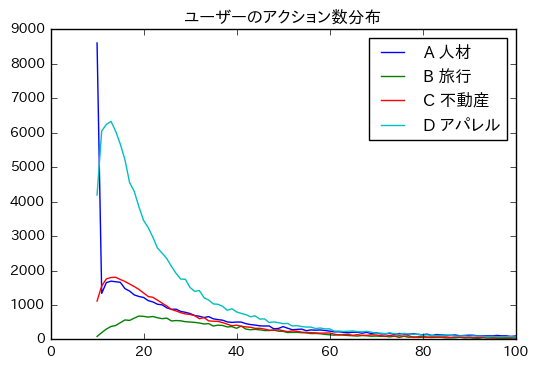

In [3]:
for train in trains:
    plt.plot(train['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのアクション数分布');
plt.xlim(0,100);

- 「10回以上アクションしたユーザのデータ」だと思われる
- 人材の10回だけ異常に多い→なぜ?

## 各アクションの回数の分布

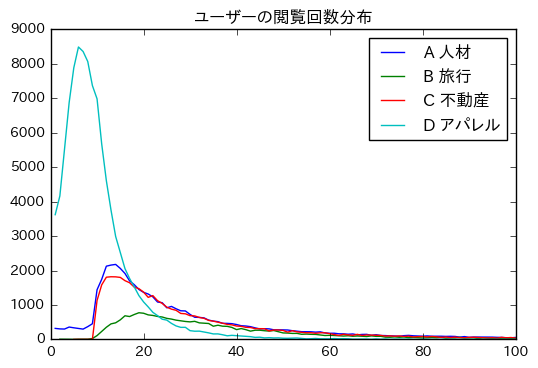

In [4]:
for train in trains:
    plt.plot(train[train['event_type'] == 1]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの閲覧回数分布');
plt.xlim(0,100);

- アパレル…閲覧が10回以下の人が多い→とりあえずカートに入れる人が多い?

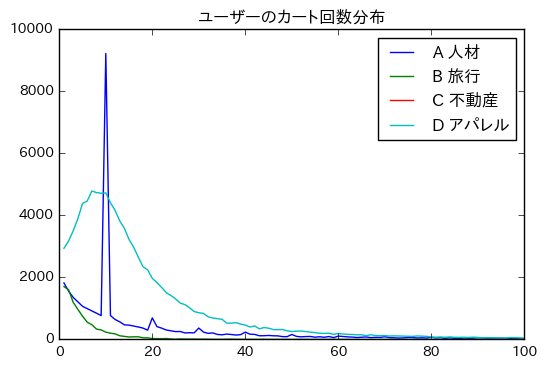

In [5]:
for train in trains:
    plt.plot(train[train['event_type'] == 0]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのカート回数分布');
plt.xlim(0,100);

- 不動産はカートが無い
- 人材は10の倍数が尖っている→10人まとめてカートに入れている?

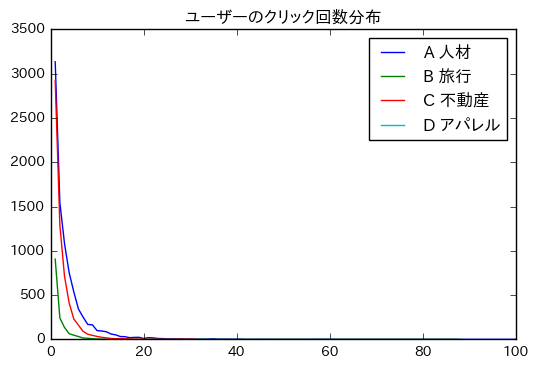

In [6]:
for train in trains:
    plt.plot(train[train['event_type'] == 2]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのクリック回数分布');
plt.xlim(0,100);

- アパレルはクリックが無い

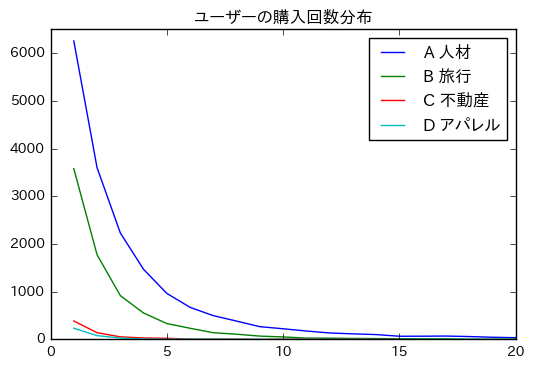

In [7]:
for train in trains:
    plt.plot(train[train['event_type'] == 3]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数分布');
plt.xlim(0,20);
plt.ylim(0,6500);

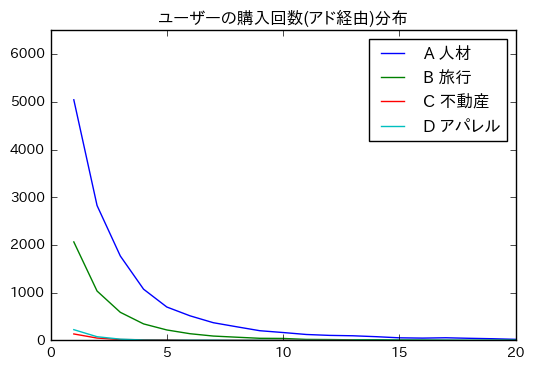

In [8]:
for train in trains:
    plt.plot(train[np.logical_and(train['event_type'] == 3, train['ad'] == 1)]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数(アド経由)分布');
plt.xlim(0,20);
plt.ylim(0,6500);

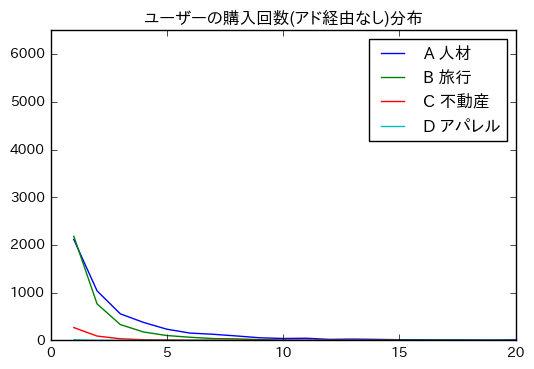

In [9]:
for train in trains:
    plt.plot(train[np.logical_and(train['event_type'] == 3, train['ad'] == 0)]['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数(アド経由なし)分布');
plt.xlim(0,20);
plt.ylim(0,6500);

### カテゴリごとの仮説

- 人材…10人ごとにカートに入れられているとしたら、まとめられているグループでクラスタリングできるのではないか？
- アパレル…カートに入れられる数が多いので、カートに入れたものが購入されやすいと推定できないか？
- 旅行を複数買っている人は、小規模な週末旅行などの可能性が高いので、1つだけの人の商品と区別できないか？